In [1]:
import numpy as np
from skimage import filters
from skimage.filters import try_all_threshold
from skimage.transform import resize
import os
import matplotlib.pyplot as plt
import cv2

# Create edge maps for annotation
This notebook is to create starting points for annotation that can be used in GIMP.
To make this notebook work, replace the path in the next code chunk with your path to the specific iamge that you want to annotate.
If you want to save the edge map created, uncomment the last line in the create_mask function and enter your save path

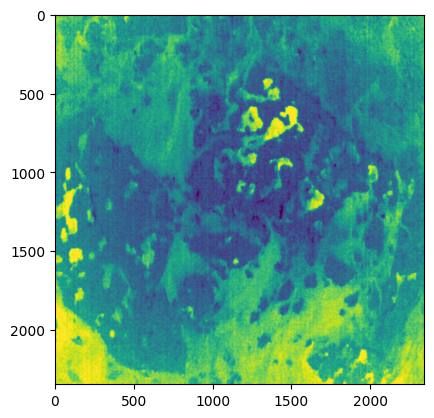

In [2]:
img = cv2.imread('E:/polar/code/ponds_extended_data/candidates/20220730_111730_100.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = resize(img, (2345,2345))
plt.imshow(img)
#plt.imsave('E:/test/potential_ir/1024_orig_size.png', img, cmap='cividis')

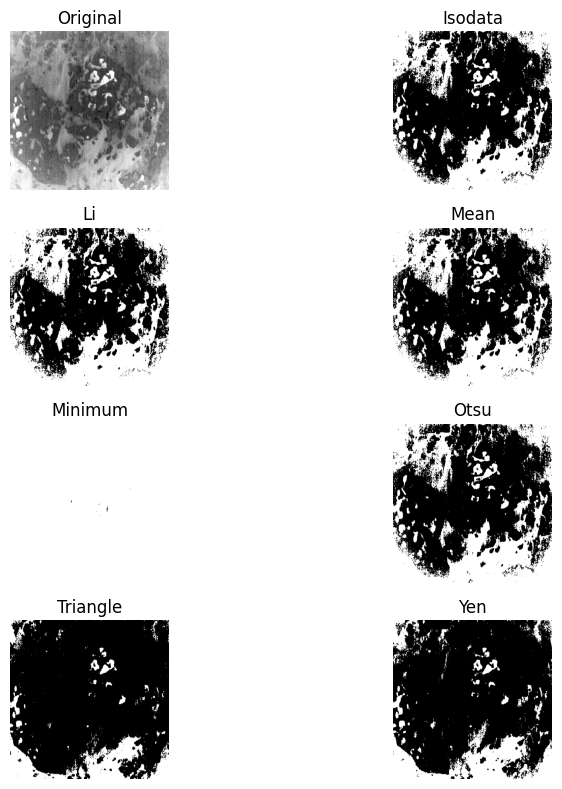

In [3]:
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [4]:
def create_mask(image, threshold='li'):
    """
    Thresholds image and denoises with Scharr filter

    Parameters:
    -----------
        image : np.array
            source image for edge map
        threshold : str
            threshold to apply

    """
    if threshold == 'otsu':
        thrs = filters.threshold_otsu(image)
    elif threshold == 'mean':
        thrs = filters.threshold_mean(image)
    elif threshold == 'li':
        thrs = filters.threshold_li(image)
    
    binary = image > thrs

    img_blurred = filters.scharr(binary)

    plt.imshow(img_blurred, cmap='Greys')
    plt.imsave('E:/polar/code/ponds_extended_data/candidates/100.png', img_blurred, cmap='Greys')

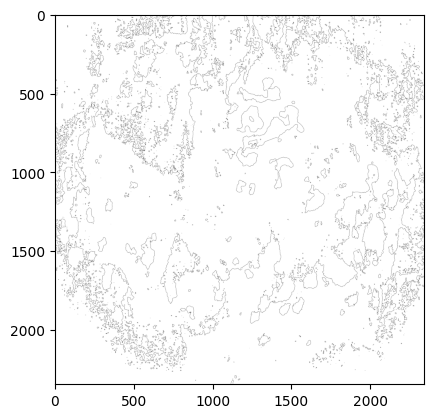

In [5]:
create_mask(img)